# NetworKIN Data Formatting

This file takes data regarding kinase-protein interactions from the NetworKIN database and converts the data into the .gmt format. The data was retrieved from the NetworKIN database on Wed, Jun 7 2017 14:55:39. This data will be added to enhance the KEA2 database and will be suitably formatted for use by the ENRICHR and X2K tools.

## Import packages necessary for following program

In [49]:
%run /home/maayanlab/Desktop/Projects/Scripts/init.ipy

## Create a dataframe from a file containing NetworKIN data

In [50]:
#read data from tsv file into dataframe 'networkin_human_predictions.tsv'
#None of the yeast data was downloaded or included from the NetworKIN site
net_df = pd.read_table('~/Desktop/Projects/KEA3/networkin_human_predictions.tsv')

#View dataframe
net_df.head()

,#substrate,position,id,networkin_score,tree,netphorest_group,netphorest_score,string_identifier,string_score,substrate_name,sequence,string_path
0,A1CF (ENSP00000363105),154,ACTR2,0.1659,KIN,ACTR2_ACTR2B_TGFbR2_group,0.0485,ENSP00000282641,0.0860,A1CF,REEILsEMKKV,"ENSP00000241416, 0.5192 ENSP00000256759, 0.480..."
1,A1CF (ENSP00000363105),154,ACTR2B,0.1659,KIN,ACTR2_ACTR2B_TGFbR2_group,0.0485,ENSP00000282641,0.0837,A1CF,REEILsEMKKV,"ENSP00000340361, 0.5192 ENSP00000256759, 0.480..."
2,A1CF (ENSP00000363105),154,AMPKa1,0.0145,KIN,AMPK_group,0.0061,ENSP00000282641,0.0960,A1CF,REEILsEMKKV,"ENSP00000346148, 0.6272 ENSP00000233242, 0.213..."
3,A1CF (ENSP00000363105),154,AMPKa2,0.0145,KIN,AMPK_group,0.0061,ENSP00000282641,0.1564,A1CF,REEILsEMKKV,"ENSP00000360290, 0.7304 ENSP00000385269, 0.675..."
4,A1CF (ENSP00000363105),154,ARAF,0.2307,KIN,ARAF_BRAF_RAF1_group,0.0877,ENSP00000282641,0.1414,A1CF,REEILsEMKKV,"ENSP00000366244, 0.76 ENSP00000356520, 0.688 E..."


### Some Notes Regarding NetworKIN scoring methods [useful for future data analyses]

The STRING netwrok score was assigned based on network proximity, and the Netphorest classifiers became Netphorest probability scores based on the peptide sequences. Combining both using an algorithim resulted in the networkin_score shown below. Calculations were also meant to account for bias of over-study in algorithm calculations.

In [55]:
#select columns necessary for .gmt format and filter into new dataframe 'df'
#should this be 'id' or 'substrate name'
df = net_df[['substrate_name', 'id', 'networkin_score']]

# Sort kinases ('id') from max to min 
#according to networKIN score
df.sort_values(by = ['networkin_score'], ascending= False, inplace=True)

len(df)

/home/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


5193537

In [52]:
#drop duplicate rows in the dataframe
df.drop_duplicates(['substrate_name', 'id'], inplace = True)

#View Dataframe
df.head(20)

,substrate_name,id,networkin_score
4723867,TP53BP1,ATM,228.1415
510447,BRCA1,ATM,228.1415
2769794,NBN,ATM,228.1415
867745,CHEK1,ATM,228.1415
3664250,RBBP8,ATM,228.1415
1506690,FANCD2,ATM,228.1415
2677357,MRE11A,ATM,228.1415
1798770,H2AFX,ATM,228.1415
4173643,SMC1A,ATM,228.1415
4722616,TP53,ATM,228.1415


In [65]:
indices = [index for index, rowData in df.networkin_score.iteritems()
           if rowData > 0.7385229]

nk = df.loc[indices]

nk.sort_values(by = 'networkin_score', ascending = True, inplace = True)

len(nk)

284242

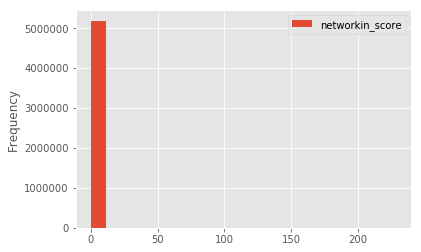

In [56]:
# Create histogram displaying the distribution of the number
#targets per kinase
df.plot.hist(by = 'networkin_score', bins = 20)

#Show histogram
plt.show()

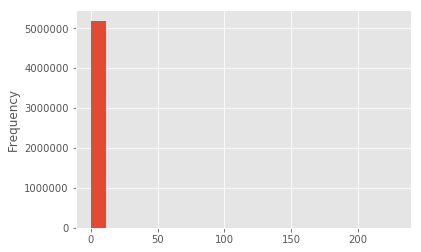

In [57]:
# Create histogram displaying the distribution of the number
#targets per kinase
df['networkin_score'].plot.hist(by = 'networkin_score', bins = 20)

#Show histogram
plt.show()

In [60]:
percent = np.percentile(df.networkin_score, 99)
percent

2.4651999999999998

## Sort Dataframe by its NetworKIN score

## Specify Species of Kinases

In [ ]:
#Join kinase names with species name 'Homo sapiens'
df.insert(0, 'kinase_organism', 'None')

#Specify species as Homo sapiens 
for index, rowData in df.id.iteritems():
    df.kinase_organism[index] = '_'.join([rowData, 'Homo sapiens'])

#View dataframe
df.head()

## Set Index to 'Kinase_Organism' and Aggregate Kinase Targets

In [ ]:
#Set index to 'kinase_organism'
df.set_index('kinase_organism')

#Group kinases in dataframe 'kin'
#Aggregate data in 'kin' according to kinase groups
kin = df.groupby('kinase_organism').agg(lambda x: tuple(x))

#Create a new column 'NetworKIN' as description of data
kin.insert(0, 'Description', 'NetworKIN')

#Visualize Data
kin.head()

# Exploratory Data Analysis

## Calculate Number of Protein targets for each kinase
Create new column with the number of substrates related to each kinase, and sort the dataframe by this column.

In [ ]:
# Create column representing counts of protein targets per kinase
kin['kinase_substrate_num'] = [len(lst) for kinase, lst in kin['substrate_name'].iteritems()]

# Sort kinases from max to min according to number of protein targets each has
kin.sort_values(by = ['kinase_substrate_num'], ascending= False, inplace=True)

# View dataframe
kin.head()

## Create Histogram to display distribution  of number of targets per kinase

In [ ]:
# Create histogram displaying the distribution of the number
#targets per kinase
kin.plot.hist(by = 'kinase_substrate_num', bins = 63)

#Show histogram
plt.show()

# Creation of Final .GMT File

## Create Dictionary of Tab-Separated Rows of the Dataframe

In [ ]:
#Reset index of the dataframe
kin.reset_index(inplace = True)

#create column 'acc_merged' in which all 'acc' elements are joined by a \t symbol
kin['substrates_merged'] = ['\t'.join(x) for x in kin['substrate_name']]

#drop the now-unneccesary column 'Substrates'
kin.drop('substrate_name', axis=1, inplace = True)

#also drop the data-exploratory column 'kinase_substrate_num'
kin.drop('kinase_substrate_num', axis=1, inplace = True)

#Create dictionary 'PhosphoSite' with index numbers as keys
NetworKIN_num = dict([(key, '') for key in kin.index])

# loop through rows with iterrows()
for index, rowData in kin.iterrows():
    line = ('\t'.join(rowData))
    NetworKIN_num[index] = line

## Write Info from Dictionary into .GMT File

In [ ]:
#Transfer tab-separated info into a new txt file
with open('NetworKIN.gmt', 'w') as openfile:
    for index in NetworKIN_num:
        openfile.write(str(NetworKIN_num[index]) + '\n')